In [15]:
from model_instantiation import *
from model_training import *
from dataset_partitioning import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.special import softmax

In [2]:
forum = 'overflow'
collection = get_mongo_collection(forum)

In [27]:
classifier_hyperparameters = {'output_dir': 'BERT', 'num_train_epochs': 1, 'disable_tqdm': False, 'batch_size': 32,
                             'evaluation_strategy': 'no'}

In [41]:
classifier_train = get_classifier_dataset_partition(collection, 'classification_train')
classifier_val = get_classifier_dataset_partition(collection, 'classification_val')
model, collate_fn = get_bert_model()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [30]:
result = train_evaluate_save(model, collate_fn, classifier_train, classifier_val, head='classification',
                             return_predictions=True, **classifier_hyperparameters)

Step,Training Loss


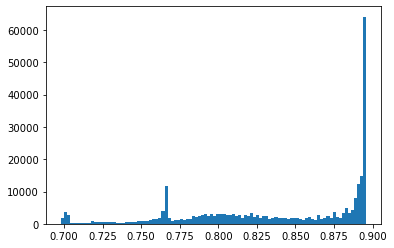

In [38]:
bins = 100
#probs = result.predictions[:,1]
probs = softmax(result.predictions, axis=1)[:,1]
labels = result.label_ids
plt.hist(probs, bins=bins);
#plt.hist(probs[labels==1], bins=bins);
#plt.hist(probs[labels==0], bins=bins);

In [17]:
probs

array([[0.204 , 0.796 ],
       [0.2307, 0.769 ],
       [0.1738, 0.8267],
       ...,
       [0.1564, 0.8438],
       [0.1403, 0.8594],
       [0.1343, 0.865 ]], dtype=float16)

In [12]:
labels

array([1, 0, 1, ..., 1, 1, 1])

In [39]:
roc_auc_score(labels, probs)

0.6060093005434956

In [ ]:
0.5873405148371975

In [ ]:
8693*32